   **Bollywood Bunch: Movies Clustering and Ratings Prediction**

Using Supervised Machine Learning algorithms and Unsupervised in one Notebookk!!

Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Reading data from csv file and load it into a DataFrame.
Data source - **Kaggle**


In [ ]:
df=pd.read_csv("/content/Indian_movies.csv")

In [ ]:
df.head()

,Unnamed: 0,Rank,Movie Names,Links,Rating,Year,Duration_of_movie,Genere,Description
0,0,1,Ramayana: The Legend of Prince Rama,https://www.imdb.com//title/tt0259534/?ref_=fe...,9.2,1993,PG,"Animation,Action,Adventure,Back to top",An anime adaptation of the Hindu epic the Rama...
1,1,2,Rocketry: The Nambi Effect,https://www.imdb.com//title/tt9263550/?ref_=fe...,8.7,2022,2h 37m,"Biography,Drama,Back to top",Based on the life of Indian Space Research Org...
2,2,3,Nayakan,https://www.imdb.com//title/tt0093603/?ref_=fe...,8.6,1987,Not Rated,"Crime,Drama,Back to top",A common man's struggles against a corrupt pol...
3,3,4,Gol Maal,https://www.imdb.com//title/tt0079221/?ref_=fe...,8.5,1979,Not Rated,"Comedy,Romance,Back to top",A man's simple lie to secure his job escalates...
4,4,5,Anbe Sivam,https://www.imdb.com//title/tt0367495/?ref_=fe...,8.6,2003,Not Rated,"Adventure,Comedy,Drama,Back to top","Two men, one young and arrogant, the other dam..."


**Data Analysis & Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         250 non-null    int64  
 1   Rank               250 non-null    int64  
 2   Movie Names        250 non-null    object 
 3   Links              250 non-null    object 
 4   Rating             250 non-null    float64
 5   Year               250 non-null    int64  
 6   Duration_of_movie  250 non-null    object 
 7   Genere             250 non-null    object 
 8   Description        250 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 17.7+ KB


In [ ]:
df.columns

Index(['Unnamed: 0', 'Rank', 'Movie Names', 'Links', 'Rating', 'Year',
       'Duration_of_movie', 'Genere', 'Description'],
      dtype='object')

In [ ]:
df.shape #total no of rows and columns

(250, 9)

In [ ]:
df.isnull().sum()

Unnamed: 0           0
Rank                 0
Movie Names          0
Links                0
Rating               0
Year                 0
Duration_of_movie    0
Genere               0
Description          0
dtype: int64

We observe that there are no missing values in data, but we see that Unnamed column is unnecessary column so dropping it

In [ ]:
df=df.drop(columns="Unnamed: 0",axis=1)

In [ ]:
df

,Rank,Movie Names,Links,Rating,Year,Duration_of_movie,Genere,Description
0,1,Ramayana: The Legend of Prince Rama,https://www.imdb.com//title/tt0259534/?ref_=fe...,9.2,1993,PG,"Animation,Action,Adventure,Back to top",An anime adaptation of the Hindu epic the Rama...
1,2,Rocketry: The Nambi Effect,https://www.imdb.com//title/tt9263550/?ref_=fe...,8.7,2022,2h 37m,"Biography,Drama,Back to top",Based on the life of Indian Space Research Org...
2,3,Nayakan,https://www.imdb.com//title/tt0093603/?ref_=fe...,8.6,1987,Not Rated,"Crime,Drama,Back to top",A common man's struggles against a corrupt pol...
3,4,Gol Maal,https://www.imdb.com//title/tt0079221/?ref_=fe...,8.5,1979,Not Rated,"Comedy,Romance,Back to top",A man's simple lie to secure his job escalates...
4,5,Anbe Sivam,https://www.imdb.com//title/tt0367495/?ref_=fe...,8.6,2003,Not Rated,"Adventure,Comedy,Drama,Back to top","Two men, one young and arrogant, the other dam..."
...,...,...,...,...,...,...,...,...
245,246,Kai Po Che,https://www.imdb.com//title/tt2213054/?ref_=fe...,7.8,2013,Not Rated,"Drama,Sport,Back to top",Three friends growing up in India at the turn ...
246,247,Poove Unakkaga,https://www.imdb.com//title/tt2325915/?ref_=fe...,8.6,1996,2h 30m,"Comedy,Drama,Romance,Back to top",When a man realizes that the Hindu woman he lo...
247,248,Raazi,https://www.imdb.com//title/tt7098658/?ref_=fe...,7.7,2018,Not Rated,"Action,Drama,Thriller,Back to top",A Kashmiri woman agrees to marry a Pakistani a...
248,249,Dasvidaniya,https://www.imdb.com//title/tt1288638/?ref_=fe...,7.8,2008,1h 53m,"Comedy,Drama,Back to top","A man who loves to make ""to-do lists"" makes on..."


In [ ]:
df[["Movie Names","Rating"]]

,Movie Names,Rating
0,Ramayana: The Legend of Prince Rama,9.2
1,Rocketry: The Nambi Effect,8.7
2,Nayakan,8.6
3,Gol Maal,8.5
4,Anbe Sivam,8.6
...,...,...
245,Kai Po Che,7.8
246,Poove Unakkaga,8.6
247,Raazi,7.7
248,Dasvidaniya,7.8


In [ ]:
# Split the genre strings into lists
df['genres'] = df['Genere'].str.split(',')

# Get a set of all unique genres
all_genres = set(genre for genres in df['genres'] for genre in genres)

# Create a column for each genre with a binary indicator
for genre in all_genres:
    df[genre] = df['genres'].apply(lambda x: 1 if genre in x else 0)

# Drop the original genres column
df = df.drop('Genere', axis=1)

print(df)


     Rank                          Movie Names  \
0       1  Ramayana: The Legend of Prince Rama   
1       2           Rocketry: The Nambi Effect   
2       3                              Nayakan   
3       4                             Gol Maal   
4       5                           Anbe Sivam   
..    ...                                  ...   
245   246                           Kai Po Che   
246   247                       Poove Unakkaga   
247   248                                Raazi   
248   249                          Dasvidaniya   
249   250                                  Dia   

                                                 Links  Rating  Year  \
0    https://www.imdb.com//title/tt0259534/?ref_=fe...     9.2  1993   
1    https://www.imdb.com//title/tt9263550/?ref_=fe...     8.7  2022   
2    https://www.imdb.com//title/tt0093603/?ref_=fe...     8.6  1987   
3    https://www.imdb.com//title/tt0079221/?ref_=fe...     8.5  1979   
4    https://www.imdb.com//title/tt0367

In [ ]:
df.head(1)

,Rank,Movie Names,Links,Rating,Year,Duration_of_movie,Description,genres,Sci-Fi,Drama,...,Animation,History,Mystery,Horror,Crime,Family,Thriller,War,Fantasy,Back to top
0,1,Ramayana: The Legend of Prince Rama,https://www.imdb.com//title/tt0259534/?ref_=fe...,9.2,1993,PG,An anime adaptation of the Hindu epic the Rama...,"[Animation, Action, Adventure, Back to top]",0,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
df.shape

(250, 28)

Created binary columns for each genre and set the value to 1 if the movie belongs to that genre, otherwise 0. Its just like One hot encoding technique used in Feature enginering

In [ ]:
df.head()

,Rank,Movie Names,Links,Rating,Year,Duration_of_movie,Description,genres,Sci-Fi,Drama,...,Animation,History,Mystery,Horror,Crime,Family,Thriller,War,Fantasy,Back to top
0,1,Ramayana: The Legend of Prince Rama,https://www.imdb.com//title/tt0259534/?ref_=fe...,9.2,1993,PG,An anime adaptation of the Hindu epic the Rama...,"[Animation, Action, Adventure, Back to top]",0,0,...,1,0,0,0,0,0,0,0,0,1
1,2,Rocketry: The Nambi Effect,https://www.imdb.com//title/tt9263550/?ref_=fe...,8.7,2022,2h 37m,Based on the life of Indian Space Research Org...,"[Biography, Drama, Back to top]",0,1,...,0,0,0,0,0,0,0,0,0,1
2,3,Nayakan,https://www.imdb.com//title/tt0093603/?ref_=fe...,8.6,1987,Not Rated,A common man's struggles against a corrupt pol...,"[Crime, Drama, Back to top]",0,1,...,0,0,0,0,1,0,0,0,0,1
3,4,Gol Maal,https://www.imdb.com//title/tt0079221/?ref_=fe...,8.5,1979,Not Rated,A man's simple lie to secure his job escalates...,"[Comedy, Romance, Back to top]",0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,Anbe Sivam,https://www.imdb.com//title/tt0367495/?ref_=fe...,8.6,2003,Not Rated,"Two men, one young and arrogant, the other dam...","[Adventure, Comedy, Drama, Back to top]",0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.drop(columns=["genres","Links"],inplace=True)

In [ ]:
df

,Rank,Movie Names,Rating,Year,Duration_of_movie,Description,Sci-Fi,Drama,Action,Sport,...,Animation,History,Mystery,Horror,Crime,Family,Thriller,War,Fantasy,Back to top
0,1,Ramayana: The Legend of Prince Rama,9.2,1993,PG,An anime adaptation of the Hindu epic the Rama...,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,2,Rocketry: The Nambi Effect,8.7,2022,2h 37m,Based on the life of Indian Space Research Org...,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,Nayakan,8.6,1987,Not Rated,A common man's struggles against a corrupt pol...,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,4,Gol Maal,8.5,1979,Not Rated,A man's simple lie to secure his job escalates...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,Anbe Sivam,8.6,2003,Not Rated,"Two men, one young and arrogant, the other dam...",0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,Kai Po Che,7.8,2013,Not Rated,Three friends growing up in India at the turn ...,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
246,247,Poove Unakkaga,8.6,1996,2h 30m,When a man realizes that the Hindu woman he lo...,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
247,248,Raazi,7.7,2018,Not Rated,A Kashmiri woman agrees to marry a Pakistani a...,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
248,249,Dasvidaniya,7.8,2008,1h 53m,"A man who loves to make ""to-do lists"" makes on...",0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
year_rating=df[["Year","Rating"]]

Data Visualization

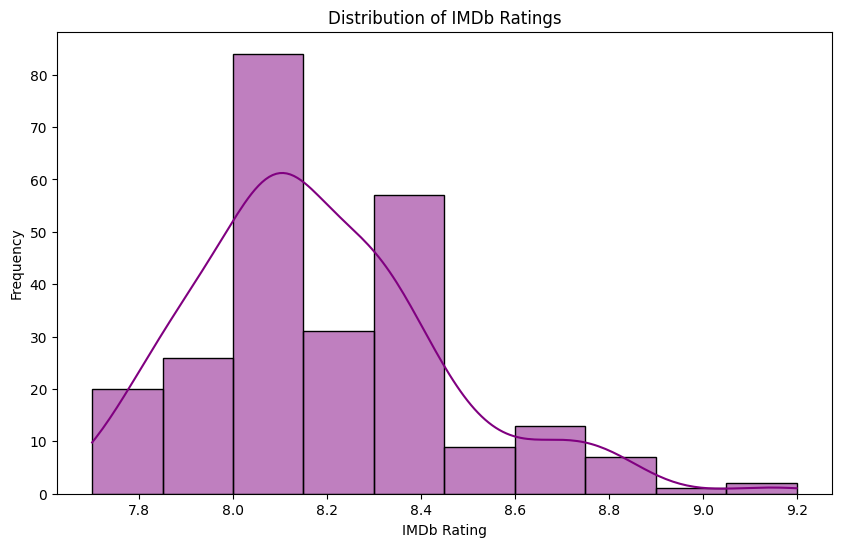

In [ ]:
# Histogram for IMDb ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=10, kde=True, color='purple')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

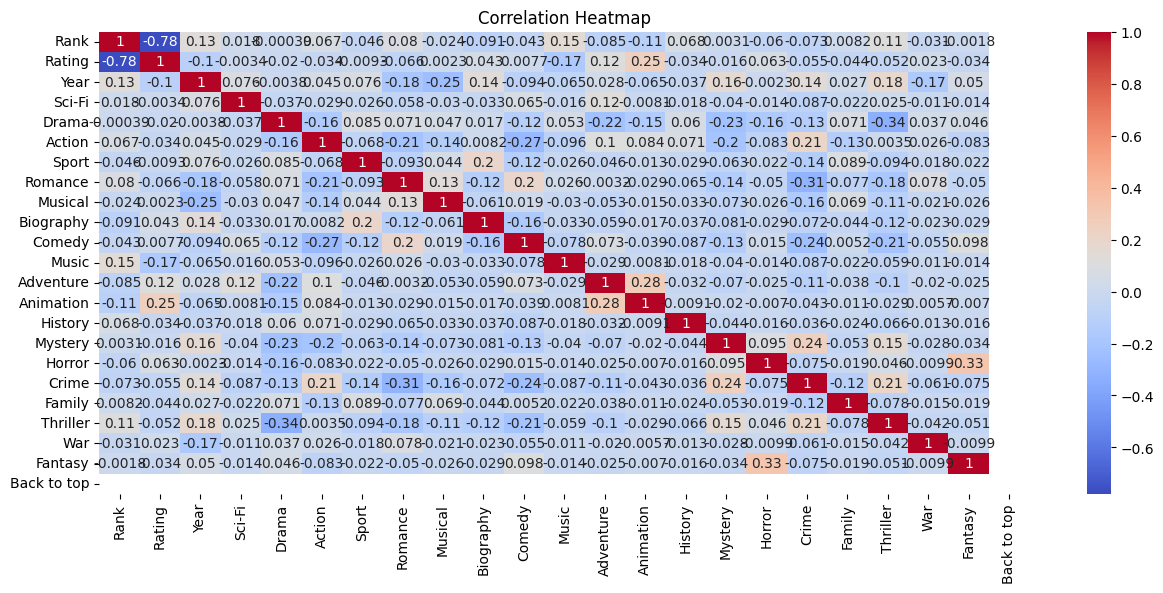

In [ ]:
# Plot the heatmap

corr=df.drop(columns=["Movie Names","Description","Duration_of_movie"]).corr()
plt.figure(figsize=(15, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-124-3e9624708e67>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Comedy', 'Crime','Romance','Fantasy','Drama'], y=[comedy_ratings, crime_ratings,romance_ratings,fantasy_ratings,drama_ratings], palette='viridis')


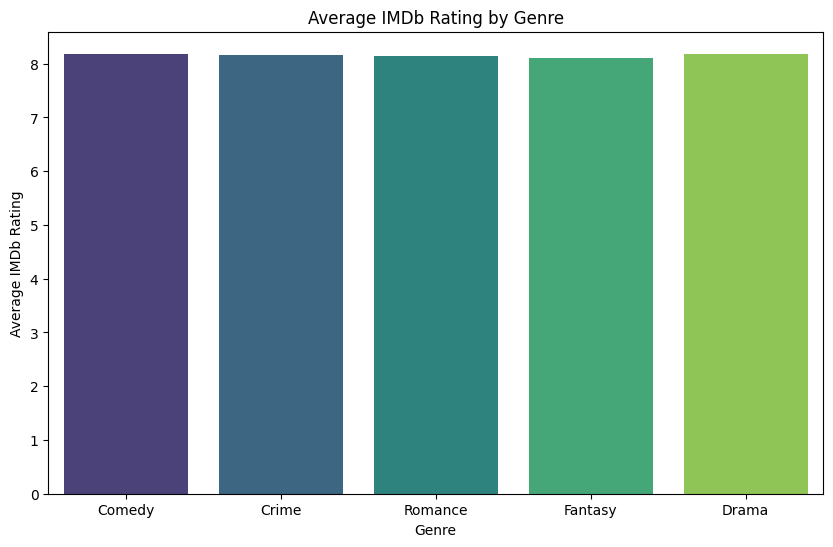

In [ ]:
import seaborn as sns

comedy_ratings = df[df['Comedy'] == 1]['Rating'].mean()
crime_ratings = df[df['Crime'] == 1]['Rating'].mean()
romance_ratings = df[df['Romance'] == 1]['Rating'].mean()
drama_ratings = df[df['Drama'] == 1]['Rating'].mean()
fantasy_ratings = df[df['Fantasy'] == 1]['Rating'].mean()


# Bar plot for average IMDb rating per genre
plt.figure(figsize=(10, 6))
sns.barplot(x=['Comedy', 'Crime','Romance','Fantasy','Drama'], y=[comedy_ratings, crime_ratings,romance_ratings,fantasy_ratings,drama_ratings], palette='viridis')
plt.title('Average IMDb Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average IMDb Rating')
plt.show()


In [ ]:
df.shape

(250, 26)

Feature Engineering: Convert categorical features into numerical format using techniques like one-hot encoding.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer  # TO handle missing values and used when we automate the process
from sklearn.preprocessing import StandardScaler # Feature scaling
from sklearn.preprocessing import OneHotEncoder  # categorical to numercial
from sklearn.compose import ColumnTransformer

In [ ]:
df.columns

Index(['Rank', 'Movie Names', 'Rating', 'Year', 'Duration_of_movie',
       'Description', 'Sci-Fi', 'Drama', 'Action', 'Sport', 'Romance',
       'Musical', 'Biography', 'Comedy', 'Music', 'Adventure', 'Animation',
       'History', 'Mystery', 'Horror', 'Crime', 'Family', 'Thriller', 'War',
       'Fantasy', 'Back to top'],
      dtype='object')

Splitting training and testing data. Training data is the data i am gonna feed to model and testing data is the data we give after training to test the model

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# encoder=LabelEncoder()
# df["Movie Names"]=encoder.fit_transform(df["Movie Names"])
# df["Description"]=encoder.fit_transform(df["Description"])
# df["Duration_of_movie"]=encoder.fit_transform(df["Duration_of_movie"])

Converting the data into dataframe. As we go ahead we are going to automate the feature engineering process

In [ ]:
df=pd.DataFrame(df)

In [ ]:
x=df.drop(columns=['Rating'],axis=1)
y=df.Rating

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
df.columns

Index(['Rank', 'Movie Names', 'Rating', 'Year', 'Duration_of_movie',
       'Description', 'Sci-Fi', 'Drama', 'Action', 'Sport', 'Romance',
       'Musical', 'Biography', 'Comedy', 'Music', 'Adventure', 'Animation',
       'History', 'Mystery', 'Horror', 'Crime', 'Family', 'Thriller', 'War',
       'Fantasy', 'Back to top'],
      dtype='object')

In [ ]:
x_train.columns

Index(['Rank', 'Movie Names', 'Year', 'Duration_of_movie', 'Description',
       'Sci-Fi', 'Drama', 'Action', 'Sport', 'Romance', 'Musical', 'Biography',
       'Comedy', 'Music', 'Adventure', 'Animation', 'History', 'Mystery',
       'Horror', 'Crime', 'Family', 'Thriller', 'War', 'Fantasy',
       'Back to top'],
      dtype='object')

In [ ]:
categorical_columns=["Movie Names","Description",'Duration_of_movie']
numerical_column=['Rank', 'Year',
       'Romance', 'Animation', 'Music', 'Comedy', 'Sci-Fi', 'Biography',
       'Family', 'Fantasy', 'Horror', 'Back to top', 'Adventure', 'Musical',
       'Sport', 'War', 'Action', 'Mystery', 'History', 'Thriller', 'Crime',
       'Drama']

In [ ]:
# FEATURE ENGINEERING AUTOMATION
num_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="mean")), #missing values handled
        ("scaler",StandardScaler())   #feature scaling
    ]
)
categorical_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")), #missing values handled
        ("onehotencoder",OneHotEncoder(handle_unknown='ignore')) # categorical to numerical
    ]

)

In [ ]:
preprocessor=ColumnTransformer(
    [
        ("num_pipeline",num_pipeline,numerical_column),
        ("categorical_pipeline",categorical_pipeline,categorical_columns)
    ]
)

In [ ]:
x_train=preprocessor.fit_transform(x_train)
x_test=preprocessor.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

# MODEL TRAINING AUTOMATION
models={

    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor()

}

In [ ]:
from sklearn.metrics import r2_score
def evaluate_model(x_train,x_test,y_train,y_test,models):
    report={}
    for i in range(len(models)):
        model=list(models.values())[i]
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        score=r2_score(y_test,y_pred)
        report[list(models.keys())[i]]=score
    return report

evaluate_model(x_train,x_test,y_train,y_test,models)

{'Random Forest': 0.7681729189789125, 'Decision Tree': 0.5227524972253055}

We observe that Random Forest gives score of 75% and Decision Tree of 67% , its better to use Random Forest for accuracy.

In [ ]:
regressor=RandomForestRegressor()
model=regressor.fit(x_train,y_train)
ypred=model.predict(x_test)

In [ ]:
print(ypred)

[8.043 8.587 8.114 8.342 8.289 8.116 7.978 8.071 8.756 8.107 7.986 7.951
 7.826 7.806 8.233 7.904 8.006 8.555 8.084 8.613 7.884 8.473 8.113 8.219
 8.068 8.332 8.271 8.673 8.563 8.179 7.938 8.32  8.121 7.913 8.594 8.109
 8.447 7.987 8.068 8.074 8.144 8.199 8.109 8.039 7.94  8.614 8.052 8.213
 8.027 8.295]


**Unsupervised learning** - In order to divide the movies into separate clusters we use unsupervised learning technique. There are many clustering techniques like **K-means, Dbscan, Hierarchical Clustering**

K means Clustering

In [ ]:
df.head()

,Rank,Movie Names,Rating,Year,Duration_of_movie,Description,Sci-Fi,Drama,Action,Sport,...,Animation,History,Mystery,Horror,Crime,Family,Thriller,War,Fantasy,Back to top
0,1,Ramayana: The Legend of Prince Rama,9.2,1993,PG,An anime adaptation of the Hindu epic the Rama...,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,2,Rocketry: The Nambi Effect,8.7,2022,2h 37m,Based on the life of Indian Space Research Org...,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,Nayakan,8.6,1987,Not Rated,A common man's struggles against a corrupt pol...,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,4,Gol Maal,8.5,1979,Not Rated,A man's simple lie to secure his job escalates...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,Anbe Sivam,8.6,2003,Not Rated,"Two men, one young and arrogant, the other dam...",0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
x

,Rank,Movie Names,Year,Duration_of_movie,Description,Sci-Fi,Drama,Action,Sport,Romance,...,Animation,History,Mystery,Horror,Crime,Family,Thriller,War,Fantasy,Back to top
0,1,Ramayana: The Legend of Prince Rama,1993,PG,An anime adaptation of the Hindu epic the Rama...,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2,Rocketry: The Nambi Effect,2022,2h 37m,Based on the life of Indian Space Research Org...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,Nayakan,1987,Not Rated,A common man's struggles against a corrupt pol...,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,4,Gol Maal,1979,Not Rated,A man's simple lie to secure his job escalates...,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,5,Anbe Sivam,2003,Not Rated,"Two men, one young and arrogant, the other dam...",0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,Kai Po Che,2013,Not Rated,Three friends growing up in India at the turn ...,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
246,247,Poove Unakkaga,1996,2h 30m,When a man realizes that the Hindu woman he lo...,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
247,248,Raazi,2018,Not Rated,A Kashmiri woman agrees to marry a Pakistani a...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
248,249,Dasvidaniya,2008,1h 53m,"A man who loves to make ""to-do lists"" makes on...",0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y_train

132    8.2
225    8.0
238    7.8
119    8.2
136    8.1
      ... 
106    8.1
14     8.5
92     8.1
179    8.2
102    8.3
Name: Rating, Length: 200, dtype: float64

In [ ]:
df=pd.read_csv("Indian_movies.csv")

In [ ]:
df=df.drop(columns="Links")

In [ ]:
df = pd.get_dummies(df, columns=['Genere'])

In [ ]:
df

,Unnamed: 0,Rank,Movie Names,Rating,Year,Duration_of_movie,Description,"Genere_Action,Adventure,Back to top","Genere_Action,Adventure,Comedy,Back to top","Genere_Action,Adventure,Crime,Back to top",...,"Genere_Drama,Musical,Sport,Back to top","Genere_Drama,Mystery,Thriller,Back to top","Genere_Drama,Romance,Back to top","Genere_Drama,Romance,Thriller,Back to top","Genere_Drama,Romance,War,Back to top","Genere_Drama,Sci-Fi,Thriller,Back to top","Genere_Drama,Sport,Back to top","Genere_Drama,Thriller,Back to top","Genere_Horror,Thriller,Back to top","Genere_Mystery,Thriller,Back to top"
0,0,1,Ramayana: The Legend of Prince Rama,9.2,1993,PG,An anime adaptation of the Hindu epic the Rama...,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,2,Rocketry: The Nambi Effect,8.7,2022,2h 37m,Based on the life of Indian Space Research Org...,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,3,Nayakan,8.6,1987,Not Rated,A common man's struggles against a corrupt pol...,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,4,Gol Maal,8.5,1979,Not Rated,A man's simple lie to secure his job escalates...,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,5,Anbe Sivam,8.6,2003,Not Rated,"Two men, one young and arrogant, the other dam...",False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,246,Kai Po Che,7.8,2013,Not Rated,Three friends growing up in India at the turn ...,False,False,False,...,False,False,False,False,False,False,True,False,False,False
246,246,247,Poove Unakkaga,8.6,1996,2h 30m,When a man realizes that the Hindu woman he lo...,False,False,False,...,False,False,False,False,False,False,False,False,False,False
247,247,248,Raazi,7.7,2018,Not Rated,A Kashmiri woman agrees to marry a Pakistani a...,False,False,False,...,False,False,False,False,False,False,False,False,False,False
248,248,249,Dasvidaniya,7.8,2008,1h 53m,"A man who loves to make ""to-do lists"" makes on...",False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
scaler = StandardScaler()
df['Rating'] = scaler.fit_transform(df[['Rating']])


In [ ]:
df['Rating']

0      3.875572
1      1.972049
2      1.591345
3      1.210640
4      1.591345
         ...   
245   -1.454291
246    1.591345
247   -1.834996
248   -1.454291
249   -0.692882
Name: Rating, Length: 250, dtype: float64

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
features=df.drop(columns=["Movie Names","Duration_of_movie","Description"])
wss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    wss.append(kmeans.inertia_)
wss

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[2658168.407999999,
 703922.5390299729,
 342019.8280348221,
 215629.5734383943,
 156189.42615358197,
 124152.12457735847,
 104984.61308040583,
 91839.3987140654,
 79267.19502004198,
 70545.30768725328]

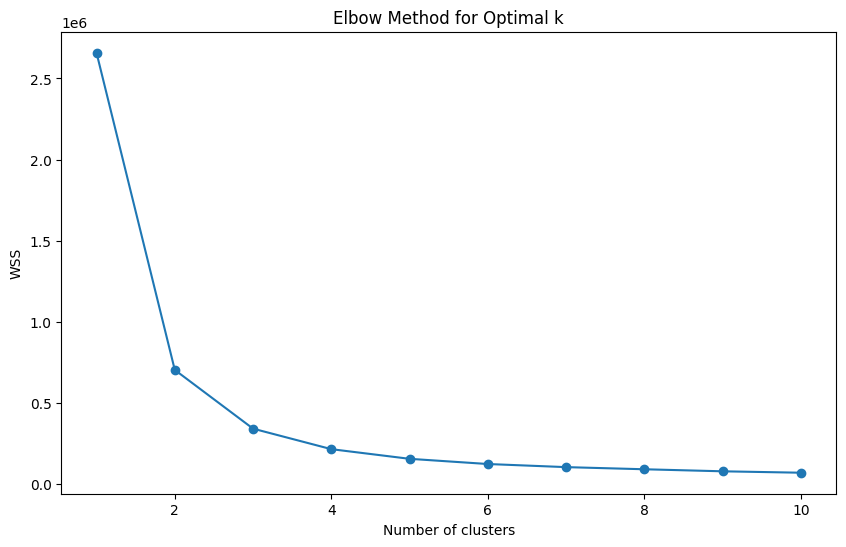

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=9, random_state=42)
df['cluster'] = kmeans.fit_predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


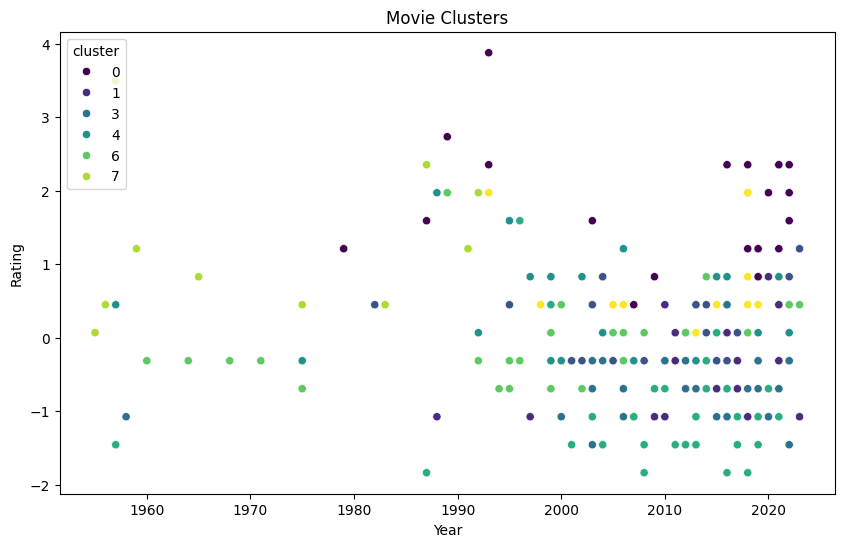

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Year', y='Rating', hue='cluster', palette='viridis')
plt.title('Movie Clusters')
plt.show()


In [ ]:
for cluster in df['cluster'].unique():
    print(f"Cluster {cluster}:\n", df[df['cluster'] == cluster][['Movie Names', 'Rating', 'Year']].head(), "\n")

Cluster 0:
                            Movie Names    Rating  Year
0  Ramayana: The Legend of Prince Rama  3.875572  1993
1           Rocketry: The Nambi Effect  1.972049  2022
2                              Nayakan  1.591345  1987
3                             Gol Maal  1.210640  1979
4                           Anbe Sivam  1.591345  2003 

Cluster 7:
          Movie Names    Rating  Year
9   The World of Apu  1.210640  1959
23         Mayabazar  3.494868  1957
27      Thevar Magan  1.972049  1992
30        Thalapathi  1.210640  1991
31      Nadodikkattu  2.352754  1987 

Cluster 8:
           Movie Names    Rating  Year
32           Drishyam  0.449231  2013
33       Thani Oruvan  0.829936  2015
36       Vada Chennai  0.829936  2018
38  Khosla Ka Ghosla!  0.449231  2006
39            Anniyan  0.449231  2005 

Cluster 4:
               Movie Names    Rating  Year
58               Chithram  1.972049  1988
63  Kannathil Muthamittal  0.829936  2002
64                 Shahid  0.068527  201

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score_coeff=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train)
    score=silhouette_score(x_train,kmeans.labels_)
    silhouette_score_coeff.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

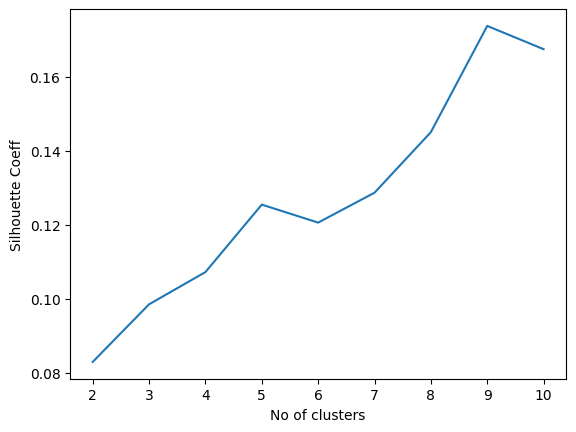

In [ ]:
plt.plot(range(2,11),silhouette_score_coeff)
plt.xticks(range(2,11))
plt.xlabel("No of clusters")
plt.ylabel("Silhouette Coeff")
plt.show()